<a href="https://colab.research.google.com/github/rodolfowenceslau/projetoenem/blob/master/ModelagemETreinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando bibliotecas

In [ ]:
#Realiza a instalação da versão mais recente da biblioteca scikit-learn
!pip3 install -U scikit-learn

     |████████████████████████████████| 6.9MB 3.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Importando bibliotecas

In [ ]:
#Manipulação de dados, DataFrames, arrays, matrizes...
import pandas as pd
import numpy as np

#Montagem do GDRIVE
from google.colab import drive

#Modelos de classificação
from sklearn.naive_bayes      import MultinomialNB
from sklearn.dummy            import DummyClassifier
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.ensemble         import RandomForestClassifier
from sklearn.ensemble         import AdaBoostClassifier
from sklearn.svm              import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

#Métricas de validação dos modelos
from sklearn.metrics import classification_report
from sklearn.metrics import (auc, accuracy_score, confusion_matrix, roc_auc_score, roc_curve)

#Pré-processamento
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder

#Plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Montando o caminho do arquivo

In [ ]:
#Montar o Google Drive
drive.mount('/content/drive/')

#Montar o nome do caminho e arquivo no qual o dataset tratado do Enem foi salvo no drive
caminhoDoArquivo = "/content/drive/My Drive/Colab Notebooks/data/MICRODADOS_ENEM_2018_TRATADO_FINAL.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Lendo o arquivo

In [ ]:
#Ler arquivo CSV do Enem para dentro da variável dataframe
#Parâmetros:
#   caminhoDoArquivo - localização do arquivo no Google Drive
#   encoding - tipo de codificação que determina como os caracteres serão exibidos
#   sep - caracter que separa as colunas do dataset
dataframe = pd.read_csv(caminhoDoArquivo, encoding='utf-8', sep=',')

In [ ]:
#Propriedade que retorna uma tupla representando a dimensionalidade (quantidade de linhas e colunas) do DataFrame.
dataframe.shape

(2226561, 42)

In [ ]:
#Variável do tipo DataFrame mostrada abaixo para demonstrar como foi o resultado da leitura do CSV
dataframe

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_MAQUINA_BRAILE,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_LINGUA,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,PASSOU_ENEM
0,São João dos Patos,MA,23.0,F,3,1,1,5,1,0,0,São João dos Patos,MA,0,B,B,A,A,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A,Nao
1,João Pessoa,PB,23.0,F,1,1,1,5,1,0,0,João Pessoa,PB,1,C,D,C,B,1,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,B,A,B,B,A,A,Nao
2,Parnaíba,PI,39.0,M,3,1,1,12,1,0,0,Parnaíba,PI,0,A,E,A,D,4,H,A,B,C,A,A,B,A,A,A,A,A,A,C,B,A,B,A,B,B,A,A,Sim
3,Fortaleza,CE,19.0,M,3,1,2,0,2,0,0,Fortaleza,CE,0,D,D,C,B,7,C,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,B,A,Nao
4,Cuiabá,MT,25.0,F,3,1,1,9,1,0,0,Cuiabá,MT,1,C,C,C,B,1,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226556,Curitiba,PR,17.0,F,1,1,2,0,4,0,0,Curitiba,PR,0,G,F,D,D,4,L,A,C,D,C,A,B,A,B,A,B,A,B,B,B,B,E,B,B,B,B,D,Sim
2226557,São Paulo,SP,20.0,F,2,1,1,2,1,0,0,São Paulo,SP,0,B,F,C,D,4,G,A,B,C,B,A,B,A,A,A,B,A,A,B,B,B,D,B,A,B,A,A,Sim
2226558,Blumenau,SC,18.0,M,1,1,2,0,2,0,0,Blumenau,SC,1,C,C,D,B,5,D,A,B,C,B,A,B,A,B,A,B,A,A,B,B,B,D,B,A,B,B,A,Sim
2226559,São Paulo,SP,18.0,M,1,1,1,1,1,0,0,São Paulo,SP,0,D,C,D,B,2,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B,A,D,Nao


# Transformando os tipos das colunas através do Label Encoder

In [ ]:
#Propriedade dtpes retorna os tipos de dados de cada um dos atributos do dataset
dataframe.dtypes

NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
TP_SEXO                     object
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
IN_TREINEIRO                 int64
IN_MAQUINA_BRAILE            int64
NO_MUNICIPIO_PROVA          object
SG_UF_PROVA                 object
TP_LINGUA                    int64
Q001                        object
Q002                        object
Q003                        object
Q004                        object
Q005                         int64
Q006                        object
Q007                        object
Q008                        object
Q009                        object
Q010                        object
Q011                        object
Q012                        object
Q013                        object
Q014                        object
Q015                

In [ ]:
#Funçao que codifica as colunas do DataFrame alterando o tipo das variáveis object para numérico
#A maioria dos algoritmos trabalha com valores numéricos, portanto, a conversão/codificação dos tipos
#foi uma estratégia para facilitar o uso dos algoritmos.
#Parâmetro:
#   dataframe - variável do tipo DataFrame
def codificarColunas(dataframe):
  label_encoders = {} # Cria um dicionário para guardar cada label encoder e permitir o processo inverso
  for col in dataframe.select_dtypes('object'): # Para cada uma das colunas do tipo object
      label_encoder = LabelEncoder() # Cria um label encoder
      label_encoder.fit(dataframe[col]) # "Treina" o label encoder 
      dataframe[col] = label_encoder.transform(dataframe[col]) # Realiza o processo de codificação da string para o código
      label_encoders[col] = label_encoder # Salva o label encoder treinado
  #print(csv.dtypes)
  return dataframe

In [ ]:
#Realiza a chamada para a função criada anteriormente, atribuindo o valor retornado para a nova variável "enemCodificado"
enemCodificado = codificarColunas(dataframe)
enemCodificado.dtypes

NO_MUNICIPIO_RESIDENCIA      int64
SG_UF_RESIDENCIA             int64
NU_IDADE                   float64
TP_SEXO                      int64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
IN_TREINEIRO                 int64
IN_MAQUINA_BRAILE            int64
NO_MUNICIPIO_PROVA           int64
SG_UF_PROVA                  int64
TP_LINGUA                    int64
Q001                         int64
Q002                         int64
Q003                         int64
Q004                         int64
Q005                         int64
Q006                         int64
Q007                         int64
Q008                         int64
Q009                         int64
Q010                         int64
Q011                         int64
Q012                         int64
Q013                         int64
Q014                         int64
Q015                

#Criação das variáveis X e y (alvo)

## Criação da variável y (atributo alvo) e atribuição da coluna PASSOU_ENEM para ela

In [ ]:
#A separação do alvo é essencial para possibilitar o treinamento e teste dos modelos nas etapas posteriores
y = enemCodificado.PASSOU_ENEM
y

0          0
1          0
2          1
3          0
4          1
          ..
2226556    1
2226557    1
2226558    1
2226559    0
2226560    1
Name: PASSOU_ENEM, Length: 2226561, dtype: int64

##Criação da variável X que recebe o dataframe sem o atributo alvo PASSOU_ENEM

In [ ]:
#X recebe o dataframe restante (todas as colunas), com exceção da coluna PASSOU_ENEM que foi atribuída para y
#No código abaixo utilizou-se a função drop para apagar a coluna PASSOU_ENEM, a função retorna um DataFrame sem a coluna indicada que foi removida durante a tarefa
X = enemCodificado.drop(columns="PASSOU_ENEM")
X

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_MAQUINA_BRAILE,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_LINGUA,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,4704,9,23.0,0,3,1,1,5,1,0,0,1488,9,0,1,1,0,0,4,1,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2469,14,23.0,0,1,1,1,5,1,0,0,814,14,1,2,3,2,1,1,1,0,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0
2,3432,16,39.0,1,3,1,1,12,1,0,0,1117,16,0,0,4,0,3,4,7,0,1,2,0,0,1,0,0,0,0,0,0,2,1,0,1,0,1,1,0,0
3,1710,5,19.0,1,3,1,2,0,2,0,0,567,5,0,3,3,2,1,7,2,0,1,2,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0
4,1368,12,25.0,0,3,1,1,9,1,0,0,476,12,1,2,2,2,1,1,2,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226556,1385,17,17.0,0,1,1,2,0,4,0,0,480,17,0,6,5,3,3,4,11,0,2,3,2,0,1,0,1,0,1,0,1,1,1,1,4,1,1,1,1,3
2226557,4756,25,20.0,0,2,1,1,2,1,0,0,1511,25,0,1,5,2,3,4,6,0,1,2,1,0,1,0,0,0,1,0,0,1,1,1,3,1,0,1,0,0
2226558,572,23,18.0,1,1,1,2,0,2,0,0,212,23,1,2,2,3,1,5,3,0,1,2,1,0,1,0,1,0,1,0,0,1,1,1,3,1,0,1,1,0
2226559,4756,25,18.0,1,1,1,1,1,1,0,0,1511,25,0,3,2,3,1,2,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,2,0,0,1,0,3


#Separação das amostras

In [ ]:
#Realiza a separação de forma randômica das amostras do DataFrame atribuindo os valores da separação
#para as variáveis X_treinamento, X_teste, y_treinamento e y_teste
#A função train_test_split admite outros parâmetros inclusive a possibilidade de se determinar o
#tamanho da amostra de testes desejada, através do atributo test_size. Exemplo: test_size=0.2 separa 20% da amostra para testes
X_treinamento, X_teste, y_treinamento, y_teste = \
    sklearn.model_selection.train_test_split(X, y, random_state=3)

In [ ]:
#Impressão da dimensionalidade de cada uma das variáveis criadas pela divisão do código anterior
print(X_treinamento.shape)
print(X_teste.shape)
print(y_treinamento.shape)
print(y_teste.shape)

(1669920, 41)
(556641, 41)
(1669920,)
(556641,)


#Modelos de Classificação Utilizados

##RandomForestClassifier

In [ ]:
# RandomForestClassifier ou Classificador de Florestas Aleatórias
# Criará várias árevores de decisão de maneira aleatória
# Combina as diferentes árvores criadas para se obter um resultado único.
# Parâmetros:
#   n_estimators - número de árvores na floresta
#   n_jobs - número de tarefas a serem executadas em paralelo. O valor -1 indica o uso de todos os processadores
rcf = RandomForestClassifier(n_estimators=12, n_jobs=-1)
rcf.fit(X_treinamento, y_treinamento) #treinamento dos dados

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
#Retorna a acurácia média dos dados e alvo fornecidos.
#6 estimators = 0.6635353845656357
#12 estimators = 0.6816745442753948
resultado = rcf.score(X_teste, y_teste)
resultado

0.6816404109650565

In [ ]:
#Prediz a classificação para o X (amostra de teste) passada como parâmetro
predicao = rcf.predict(X_teste)
predicao

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
#Importância de cada atributo, quanto maior o valor, mais importante ele foi considerado para a classificação
rcf.feature_importances_

array([7.79385653e-02, 4.37267733e-02, 5.35572558e-02, 1.37844747e-02,
       2.62475164e-02, 5.37606125e-03, 5.68798916e-03, 2.70347430e-02,
       1.20583049e-02, 2.09687181e-03, 3.03643663e-06, 7.70377090e-02,
       4.39282628e-02, 1.77621133e-02, 3.81719642e-02, 4.85033092e-02,
       3.47362793e-02, 2.79169364e-02, 4.06345116e-02, 6.62309596e-02,
       4.61504382e-03, 1.90874141e-02, 2.58177066e-02, 2.55176116e-02,
       1.51022429e-02, 5.48629027e-03, 1.34615663e-02, 1.50712127e-02,
       7.45876846e-03, 1.36368904e-02, 1.81205670e-03, 1.07520457e-02,
       1.89536427e-02, 1.56810311e-02, 1.03241752e-02, 3.15911063e-02,
       1.14894833e-02, 3.44637649e-02, 1.56125685e-02, 5.64479893e-03,
       3.59869419e-02])

In [30]:
#O classification report (relatório de classificação) traz um resumo das principais métricas para avaliar o problema de classificação
#É importante compreender o significado da métrica e do objetivo de negócio para determinar qual a melhor métrica para avaliar o modelo.
#precision - proporção de positivos classificados corretamente, ou seja, dos rótulos previstos como positivos, quantos são positivos realmente (rótulo verdadeiro). 
#recall - proporção de positivos identificados corretamente, ou seja, dos rótulos verdadeiros, quantos são positivos realmente (rótulo verdadeiro).
#f1-score - média harmônica entre precision e recall
#support - quantidade total de ocorrências de cada um dos rótulos de previsão (0 - Não e 1 - Sim)
#accuracy - número de acertos (positivos e negativos [0 e 1)) dividido pela quantidade total de registros
print(classification_report(predicao, y_teste))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70    319249
           1       0.61      0.71      0.66    237392

    accuracy                           0.68    556641
   macro avg       0.68      0.69      0.68    556641
weighted avg       0.69      0.68      0.68    556641



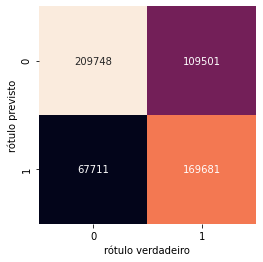

In [31]:
#Matriz de confusão (métrica para avaliação/validação) do modelo
#Verdadeiros Positivos (VP) - casos em que a previsão indicou que o candidato PASSOU (1) no Enem e realmente PASSOU (1).
#Falsos Positivos (FP) - casos em que a previsão indicou que o candidato PASSOU (1) no Enem, mas, na verdade ele NÃO PASSOU (0).
#Falsos Negativos (FN) - casos em que a previsão indicou que o candidato NÃO PASSOU (0), mas, na verdade ele PASSOU (1).
#Verdadeiros Negativos (VN) - casos em que a previsão indicou que o candidato NÃO PASSOU (0) e realmente ele NÃO PASSOU (0).
mat = confusion_matrix(y_teste, predicao)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('rótulo verdadeiro');
plt.ylabel('rótulo previsto');

##MultinomialNB

In [32]:
mnb = MultinomialNB()
mnb.fit(X_treinamento, y_treinamento) #treinamento dos dados

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
#Retorna a acurácia média dos dados e alvo fornecidos.
resultadomnb = mnb.score(X_teste, y_teste)
resultadomnb

0.6321596864047025

In [34]:
#Prediz a classificação para o X (amostra de teste) passada como parâmetro
predicaomnb = mnb.predict(X_teste)
predicaomnb

array([0, 0, 1, ..., 0, 1, 1])

In [39]:
#O classification report (relatório de classificação) traz um resumo das principais métricas para avaliar o problema de classificação
#É importante compreender o significado da métrica e do objetivo de negócio para determinar qual a melhor métrica para avaliar o modelo.
#precision - proporção de positivos classificados corretamente, ou seja, dos rótulos previstos como positivos, quantos são positivos realmente (rótulo verdadeiro). 
#recall - proporção de positivos identificados corretamente, ou seja, dos rótulos verdadeiros, quantos são positivos realmente (rótulo verdadeiro).
#f1-score - média harmônica entre precision e recall
#support - quantidade total de ocorrências de cada um dos rótulos de previsão (0 - Não e 1 - Sim)
#accuracy - número de acertos (positivos e negativos [0 e 1)) dividido pela quantidade total de registros
print(classification_report(predicaomnb, y_teste))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64    297562
           1       0.60      0.64      0.62    259079

    accuracy                           0.63    556641
   macro avg       0.63      0.63      0.63    556641
weighted avg       0.63      0.63      0.63    556641



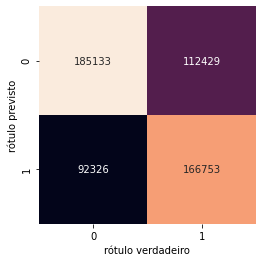

In [40]:
#Matriz de confusão (métrica para avaliação/validação) do modelo
#Verdadeiros Positivos (VP) - casos em que a previsão indicou que o candidato PASSOU (1) no Enem e realmente PASSOU (1).
#Falsos Positivos (FP) - casos em que a previsão indicou que o candidato PASSOU (1) no Enem, mas, na verdade ele NÃO PASSOU (0).
#Falsos Negativos (FN) - casos em que a previsão indicou que o candidato NÃO PASSOU (0), mas, na verdade ele PASSOU (1).
#Verdadeiros Negativos (VN) - casos em que a previsão indicou que o candidato NÃO PASSOU (0) e realmente ele NÃO PASSOU (0).
mat = confusion_matrix(y_teste, predicaomnb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('rótulo verdadeiro');
plt.ylabel('rótulo previsto');

##DummyClassifier

In [41]:
dc = DummyClassifier()
dc.fit(X_treinamento, y_treinamento)  #treinamento dos dados

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [42]:
#Retorna a acurácia média dos dados e alvo fornecidos.
resultadodc = dc.score(X_teste, y_teste)
resultadodc

0.4997727440127479

In [43]:
#Prediz a classificação para o X (amostra de teste) passada como parâmetro
predicaodc = dc.predict(X_teste)
predicaodc

array([1, 1, 1, ..., 0, 1, 0])

In [45]:
#O classification report (relatório de classificação) traz um resumo das principais métricas para avaliar o problema de classificação
#É importante compreender o significado da métrica e do objetivo de negócio para determinar qual a melhor métrica para avaliar o modelo.
#precision - proporção de positivos classificados corretamente, ou seja, dos rótulos previstos como positivos, quantos são positivos realmente (rótulo verdadeiro). 
#recall - proporção de positivos identificados corretamente, ou seja, dos rótulos verdadeiros, quantos são positivos realmente (rótulo verdadeiro).
#f1-score - média harmônica entre precision e recall
#support - quantidade total de ocorrências de cada um dos rótulos de previsão (0 - Não e 1 - Sim)
#accuracy - número de acertos (positivos e negativos [0 e 1)) dividido pela quantidade total de registros
print(classification_report(predicaodc, y_teste))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50    278391
           1       0.50      0.50      0.50    278250

    accuracy                           0.50    556641
   macro avg       0.50      0.50      0.50    556641
weighted avg       0.50      0.50      0.50    556641



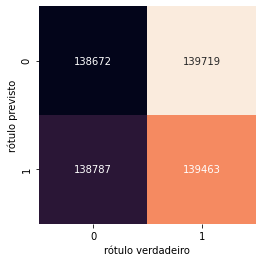

In [46]:
#Matriz de confusão (métrica para avaliação/validação) do modelo
#Verdadeiros Positivos (VP) - casos em que a previsão indicou que o candidato PASSOU (1) no Enem e realmente PASSOU (1).
#Falsos Positivos (FP) - casos em que a previsão indicou que o candidato PASSOU (1) no Enem, mas, na verdade ele NÃO PASSOU (0).
#Falsos Negativos (FN) - casos em que a previsão indicou que o candidato NÃO PASSOU (0), mas, na verdade ele PASSOU (1).
#Verdadeiros Negativos (VN) - casos em que a previsão indicou que o candidato NÃO PASSOU (0) e realmente ele NÃO PASSOU (0).
mat = confusion_matrix(y_teste, predicaodc)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('rótulo verdadeiro');
plt.ylabel('rótulo previsto');

##KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_treinamento, y_treinamento) #treinamento dos dados

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [48]:
#Retorna a acurácia média dos dados e alvo fornecidos.
resultadoknn = knn.score(X_teste, y_teste)
resultadoknn

0.6195698843599375

In [ ]:
#Prediz a classificação para o X (amostra de teste) passada como parâmetro
predicaoknn = knn.predict(X_teste)
predicaoknn

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
#O classification report (relatório de classificação) traz um resumo das principais métricas para avaliar o problema de classificação
#É importante compreender o significado da métrica e do objetivo de negócio para determinar qual a melhor métrica para avaliar o modelo.
#precision - proporção de positivos classificados corretamente, ou seja, dos rótulos previstos como positivos, quantos são positivos realmente (rótulo verdadeiro). 
#recall - proporção de positivos identificados corretamente, ou seja, dos rótulos verdadeiros, quantos são positivos realmente (rótulo verdadeiro).
#f1-score - média harmônica entre precision e recall
#support - quantidade total de ocorrências de cada um dos rótulos de previsão (0 - Não e 1 - Sim)
#accuracy - número de acertos (positivos e negativos [0 e 1)) dividido pela quantidade total de registros
print(metrics.classification_report(predicaoknn, y_teste))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62    277289
           1       0.62      0.62      0.62    279352

    accuracy                           0.62    556641
   macro avg       0.62      0.62      0.62    556641
weighted avg       0.62      0.62      0.62    556641



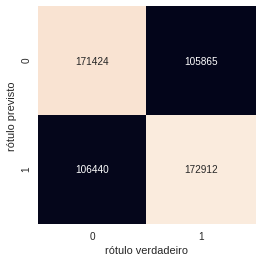

In [ ]:
#Matriz de confusão (métrica para avaliação/validação) do modelo
#Verdadeiros Positivos (VP) - casos em que a previsão indicou que o candidato PASSOU (1) no Enem e realmente PASSOU (1).
#Falsos Positivos (FP) - casos em que a previsão indicou que o candidato PASSOU (1) no Enem, mas, na verdade ele NÃO PASSOU (0).
#Falsos Negativos (FN) - casos em que a previsão indicou que o candidato NÃO PASSOU (0), mas, na verdade ele PASSOU (1).
#Verdadeiros Negativos (VN) - casos em que a previsão indicou que o candidato NÃO PASSOU (0) e realmente ele NÃO PASSOU (0).
mat = confusion_matrix(y_teste, predicaoknn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('rótulo verdadeiro');
plt.ylabel('rótulo previsto');

In [ ]:
print(classification_report(predicaoknn, y_teste))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62    277289
           1       0.62      0.62      0.62    279352

    accuracy                           0.62    556641
   macro avg       0.62      0.62      0.62    556641
weighted avg       0.62      0.62      0.62    556641



##AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_treinamento, y_treinamento) #treinamento dos dados

AdaBoostClassifier()

In [ ]:
#Retorna a acurácia média dos dados e alvo fornecidos.
resultadoabc = abc.score(X_teste, y_teste)
resultadoabc

0.7026000600027666

In [ ]:
#Prediz a classificação para o X (amostra de teste) passada como parâmetro
predicaoabc = abc.predict(X_teste)
predicaoabc

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
#O classification report (relatório de classificação) traz um resumo das principais métricas para avaliar o problema de classificação
#É importante compreender o significado da métrica e do objetivo de negócio para determinar qual a melhor métrica para avaliar o modelo.
#precision - proporção de positivos classificados corretamente, ou seja, dos rótulos previstos como positivos, quantos são positivos realmente (rótulo verdadeiro). 
#recall - proporção de positivos identificados corretamente, ou seja, dos rótulos verdadeiros, quantos são positivos realmente (rótulo verdadeiro).
#f1-score - média harmônica entre precision e recall
#support - quantidade total de ocorrências de cada um dos rótulos de previsão (0 - Não e 1 - Sim)
#accuracy - número de acertos (positivos e negativos [0 e 1)) dividido pela quantidade total de registros
print(classification_report(predicaoabc, y_teste))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71    298147
           1       0.67      0.72      0.69    258494

    accuracy                           0.70    556641
   macro avg       0.70      0.70      0.70    556641
weighted avg       0.71      0.70      0.70    556641



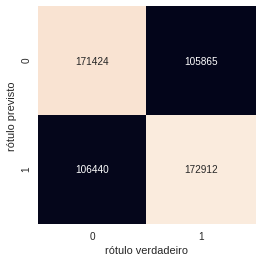

In [ ]:
mat = confusion_matrix(y_teste, predicaoknn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('rótulo verdadeiro');
plt.ylabel('rótulo previsto');

##Curva ROC de todos os Modelos

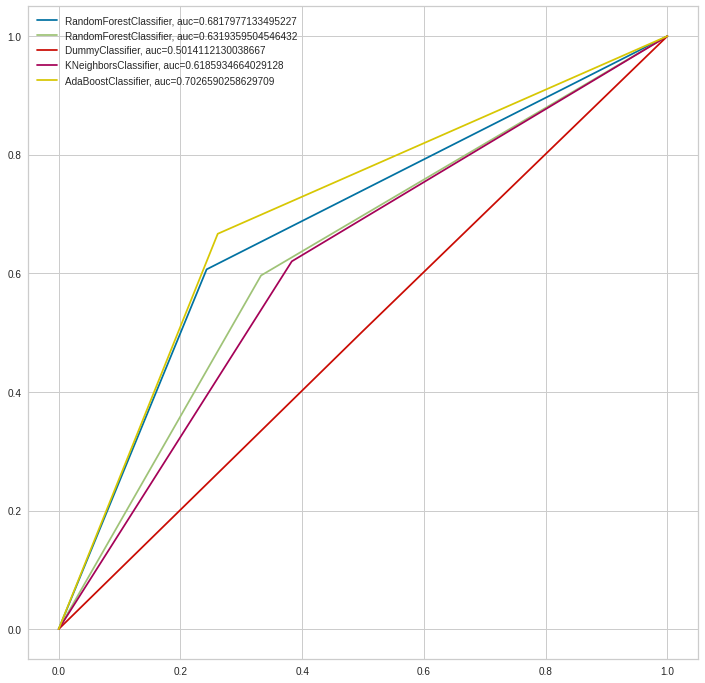

In [ ]:
plt.figure(figsize=(12,12)).clf()

fpr, tpr, thresh = metrics.roc_curve(y_teste, predicao)
auc = metrics.roc_auc_score(y_teste, predicao)
plt.plot(fpr,tpr,label="RandomForestClassifier, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_teste, predicaomnb)
auc = metrics.roc_auc_score(y_teste, predicaomnb)
plt.plot(fpr,tpr,label="RandomForestClassifier, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_teste, predicaodc)
auc = metrics.roc_auc_score(y_teste, predicaodc)
plt.plot(fpr,tpr,label="DummyClassifier, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_teste, predicaoknn)
auc = metrics.roc_auc_score(y_teste, predicaoknn)
plt.plot(fpr,tpr,label="KNeighborsClassifier, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_teste, predicaoabc)
auc = metrics.roc_auc_score(y_teste, predicaoabc)
plt.plot(fpr,tpr,label="AdaBoostClassifier, auc="+str(auc))

plt.legend(loc=0)